In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# A) First Version

In [2]:
df=pd.read_csv("data/21-housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

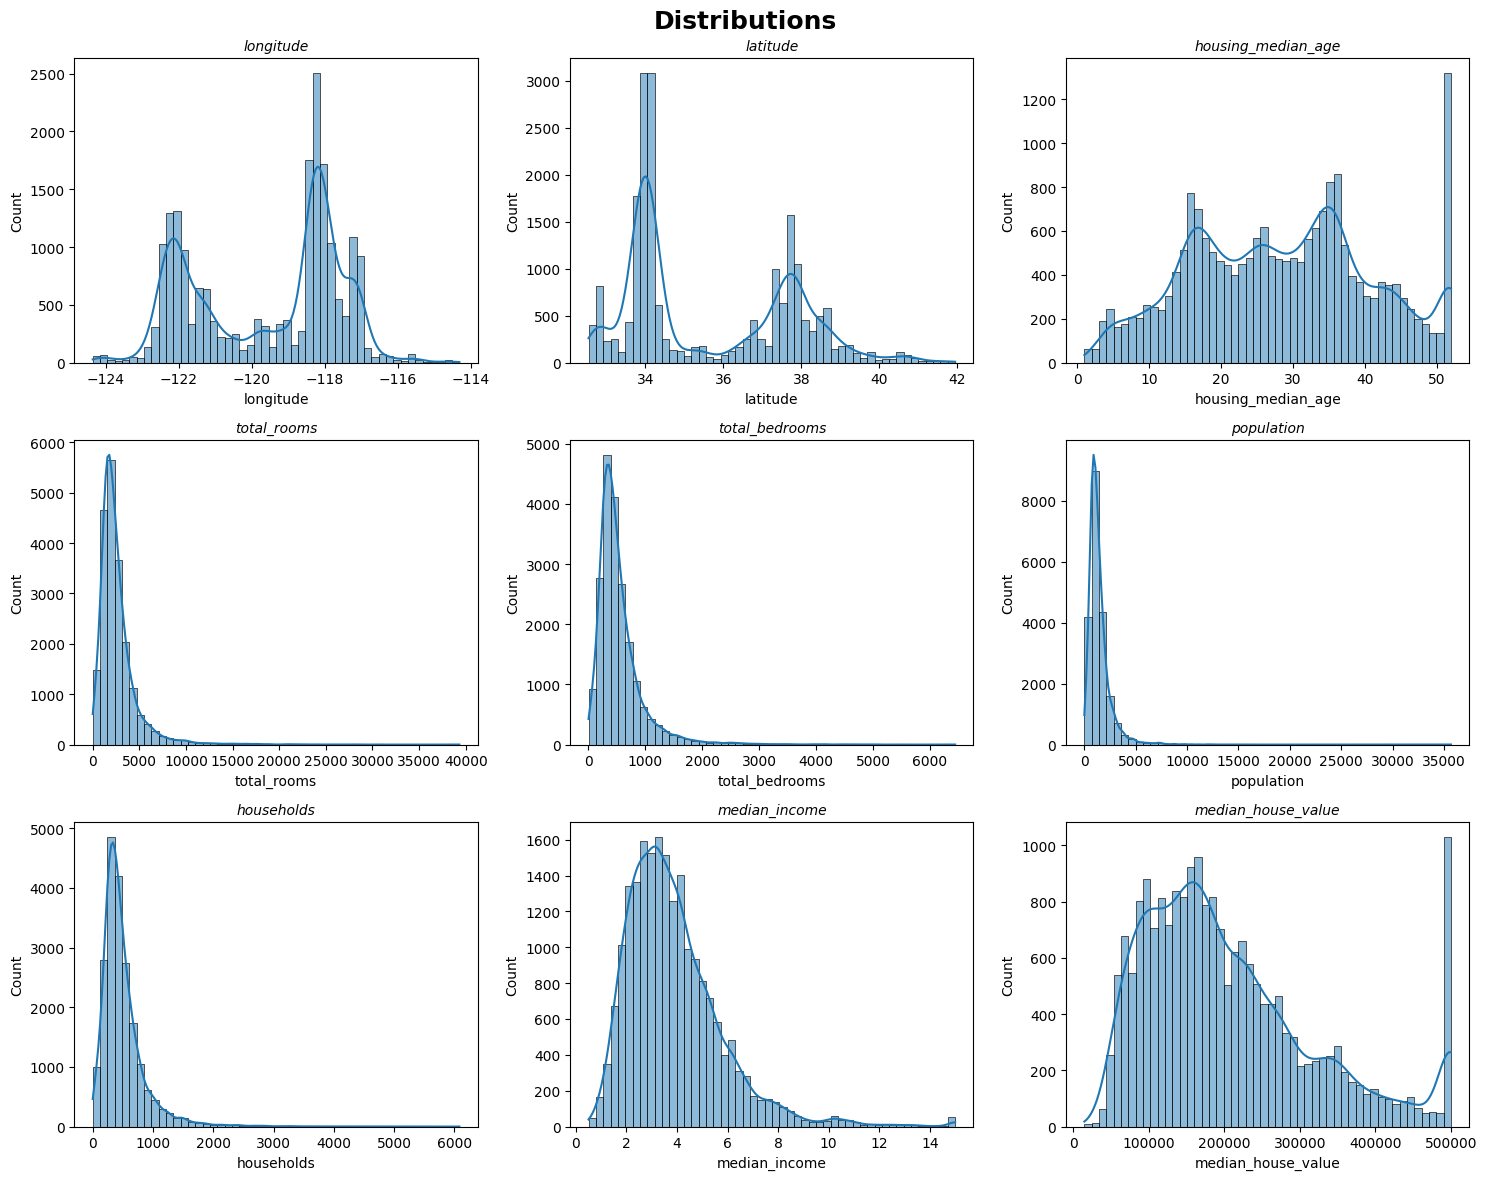

In [8]:
columns=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,12))
fig.suptitle("Distributions", fontsize=18, fontweight="bold")

for i, col in enumerate(columns):
    row=i//3
    col_idx=i%3
    ax=axes[row, col_idx]
    sns.histplot(data=df, x=col, kde=True, ax=ax, bins=50)
    ax.set_title(col, fontsize=10, fontstyle="italic")

plt.tight_layout()
plt.show()

In [9]:
df.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [10]:
df.select_dtypes("float64", "int64").columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [11]:
def find_outliers_iqr(df, threshold=1.5):
    outlier_summary = {}

    numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        outlier_summary[col] = {
            "outlier_count": outliers.shape[0],
            "outlier_percentage": 100 * outliers.shape[0] / df.shape[0],
            "lower_bound": lower_bound,
            "upper_bound": upper_bound
        }

    return pd.DataFrame(outlier_summary)

find_outliers_iqr(df)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
outlier_count,0.000,0.00,0.0,1287.000000,1271.000000,1196.000000,1220.000000,681.000000,1071.000000
outlier_percentage,0.000,0.00,0.0,6.235465,6.157946,5.794574,5.910853,3.299419,5.188953
lower_bound,-127.485,28.26,-10.5,-1102.625000,-230.500000,-620.000000,-207.500000,-0.706375,-98087.500000
upper_bound,-112.325,43.38,65.5,5698.375000,1173.500000,3132.000000,1092.500000,8.013025,482412.500000


In [12]:
def remove_outliers_from_column(df, target_col, threshold=1.5):
    Q1 = df[target_col].quantile(0.25)
    Q3 = df[target_col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    return df[(df[target_col] >= lower_bound) & (df[target_col] <= upper_bound)]


In [13]:
def remove_outliers_from_all_columns(df, threshold=1.5):
    df_clean = df.copy()
    numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

    for col in numeric_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean.copy()


In [14]:
print("original data shape: ", df.shape)

df_target_clean = remove_outliers_from_column(df, "median_house_value")
print("only target column cleaning shape: ", df_target_clean.shape)

df_all_clean = remove_outliers_from_all_columns(df)
print("all columns cleaning shape: ", df_all_clean.shape)


original data shape:  (20640, 10)
only target column cleaning shape:  (19569, 10)
all columns cleaning shape:  (16725, 10)


In [15]:
df_target_clean.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        200
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [16]:
df_target_clean = df_target_clean.copy()
df_target_clean["total_bedrooms"] = df_target_clean["total_bedrooms"].fillna(df_target_clean["total_bedrooms"].median())

In [17]:
df_target_clean.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,19569.000000,19569.000000,19569.000000,19569.000000,19569.000000,19569.000000,19569.000000,19569.000000,19569.000000
mean,-119.562786,35.654159,28.352752,2619.977260,538.841739,1442.788952,501.394859,3.665568,190852.301906
std,2.005764,2.151007,12.497772,2183.419302,420.612109,1145.011369,383.396308,1.557927,95438.555669
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.760000,33.930000,18.000000,1438.000000,299.000000,797.000000,282.000000,2.522700,116200.000000
50%,-118.510000,34.270000,28.000000,2110.000000,437.000000,1181.000000,411.000000,3.441200,173200.000000
75%,-117.990000,37.730000,37.000000,3123.000000,645.000000,1749.000000,606.000000,4.572100,246700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,482200.000000


In [18]:
df_target_clean.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [19]:
df_target_clean["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     8552
INLAND        6519
NEAR OCEAN    2419
NEAR BAY      2074
ISLAND           5
Name: count, dtype: int64

In [20]:
df_target_clean = pd.get_dummies(df_target_clean, columns=["ocean_proximity"], drop_first=True)
df_target_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


In [21]:
X = df_target_clean.drop("median_house_value", axis=1)
y = df_target_clean["median_house_value"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [22]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

In [23]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [24]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Adaboost Regressor": AdaBoostRegressor(),
    "Gradient Boost Regressor": GradientBoostingRegressor(),
    "XGBoost Regressor": XGBRegressor()
}

In [25]:
for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    print("Model performance for Training Set")
    print("Root Mean Squared Error: ", model_train_rmse)
    print("Mean Absolute Error: ", model_train_mae)
    print("R2 Score: ", model_train_r2)
    print("===================================")
    print("Model performance for Test Set")
    print("Root Mean Squared Error: ", model_test_rmse)
    print("Mean Absolute Error: ", model_test_mae)
    print("R2 Score: ", model_test_r2)
    print("===================================\n")

Linear Regression
Model performance for Training Set
Root Mean Squared Error:  59377.10592926238
Mean Absolute Error:  43858.387482410886
R2 Score:  0.6104236470924751
Model performance for Test Set
Root Mean Squared Error:  58769.54725739239
Mean Absolute Error:  43594.36386300802
R2 Score:  0.6263296157229491

Lasso
Model performance for Training Set
Root Mean Squared Error:  59377.144668562716
Mean Absolute Error:  43859.00858534639
R2 Score:  0.6104231387510857
Model performance for Test Set
Root Mean Squared Error:  58768.462304422465
Mean Absolute Error:  43594.66878006602
R2 Score:  0.6263434123598097

Ridge
Model performance for Training Set
Root Mean Squared Error:  59381.16868007145
Mean Absolute Error:  43864.677314937275
R2 Score:  0.6103703334199277
Model performance for Test Set
Root Mean Squared Error:  58763.96125806029
Mean Absolute Error:  43597.14291244857
R2 Score:  0.6264006465004595

K Neighbors Regressor
Model performance for Training Set
Root Mean Squared Error:

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

xgboost_params = {
    "learning_rate": [0.1, 0.01],
    "max_depth": [5, 8, 12, 20],
    "n_estimators": [100, 200, 300, 500],
    "colsample_bytree": [0.3, 0.4, 0.5, 0.7, 1]
}

randomized_cv = RandomizedSearchCV(
    estimator=XGBRegressor(),
    param_distributions=xgboost_params,
    cv=5,
    n_jobs=-1
)

randomized_cv.fit(X_train, y_train)

best_params = randomized_cv.best_params_
print(best_params)

{'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1}


In [27]:
model = XGBRegressor(
    n_estimators=500,
    max_depth=8,
    learning_rate=0.1,
    colsample_bytree=1
)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, ...)

In [28]:
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    print("Model performance for Training Set")
    print("Root Mean Squared Error: ", model_train_rmse)
    print("Mean Absolute Error: ", model_train_mae)
    print("R2 Score: ", model_train_r2)
    print("===================================")
    print("Model performance for Test Set")
    print("Root Mean Squared Error: ", model_test_rmse)
    print("Mean Absolute Error: ", model_test_mae)
    print("R2 Score: ", model_test_r2)
    print("===================================\n")

XGBoost Regressor
Model performance for Training Set
Root Mean Squared Error:  7172.558225934355
Mean Absolute Error:  5009.046499431943
R2 Score:  0.9943153634847294
Model performance for Test Set
Root Mean Squared Error:  41351.62300691671
Mean Absolute Error:  27689.92868814938
R2 Score:  0.81500111615794



# B) With Transformation & LightGBM added

## 1) Previous

In [53]:
df=pd.read_csv("data/21-housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [55]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [56]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [57]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

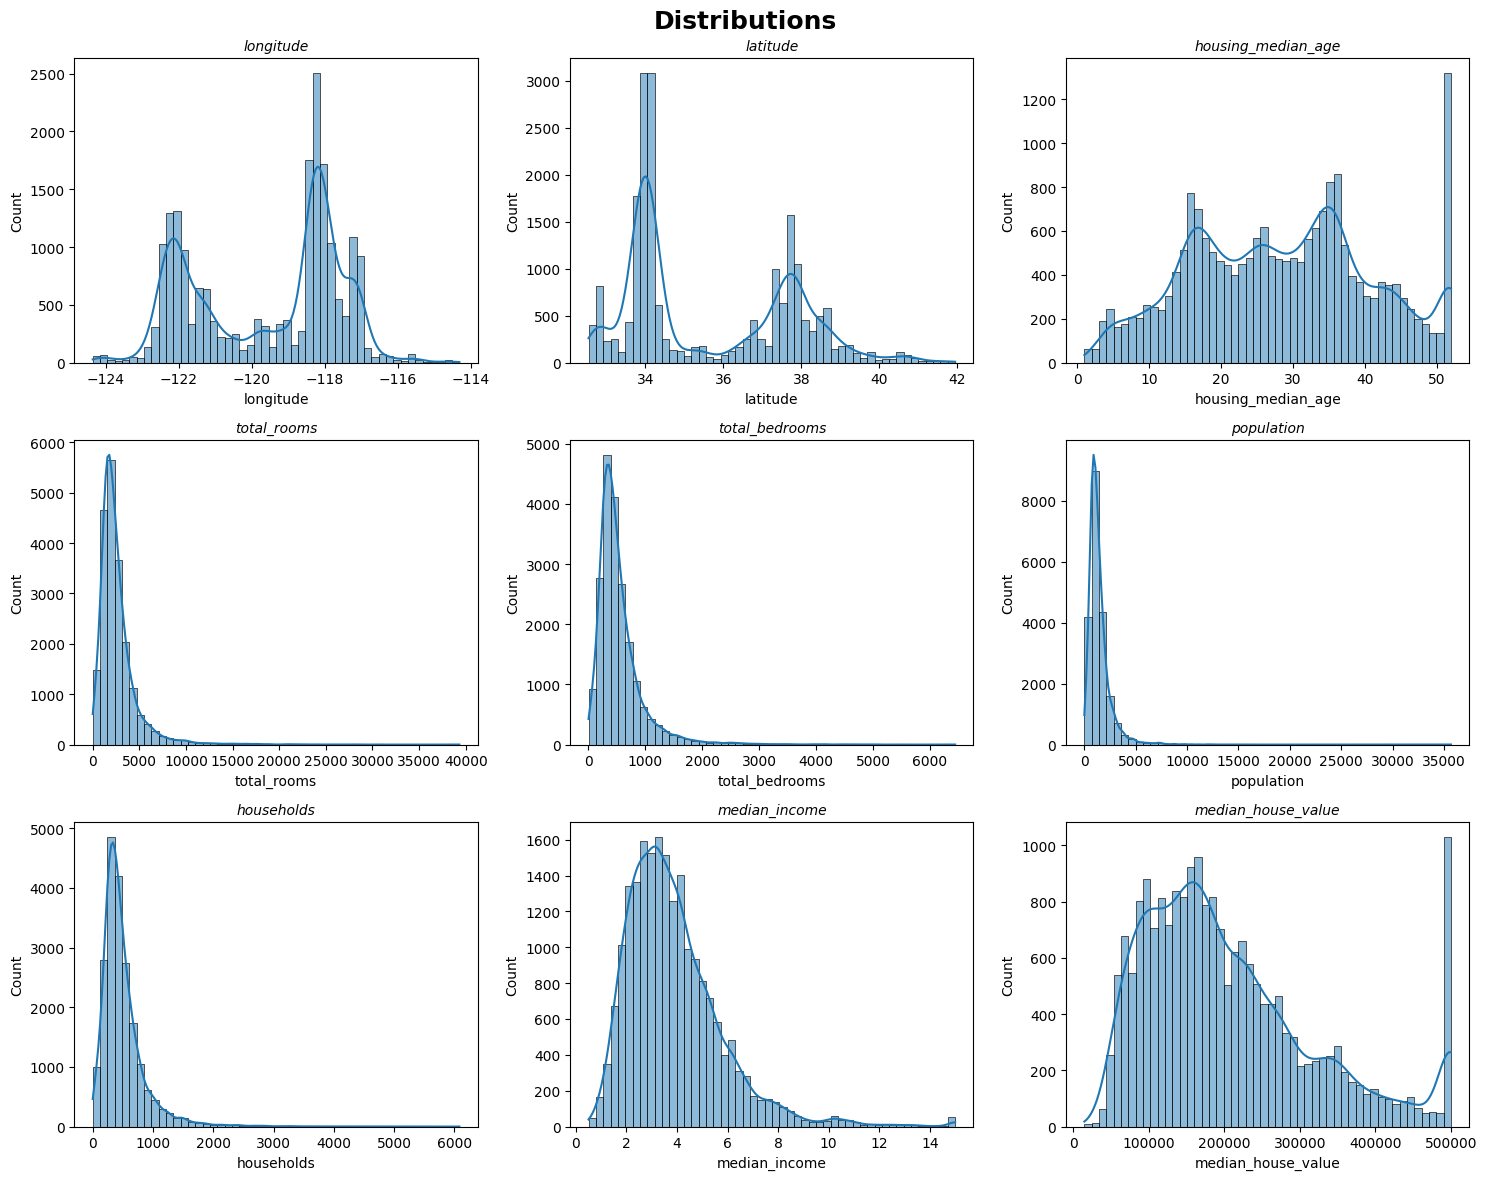

In [58]:
columns=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,12))
fig.suptitle("Distributions", fontsize=18, fontweight="bold")

for i, col in enumerate(columns):
    row=i//3
    col_idx=i%3
    ax=axes[row, col_idx]
    sns.histplot(data=df, x=col, kde=True, ax=ax, bins=50)
    ax.set_title(col, fontsize=10, fontstyle="italic")

plt.tight_layout()
plt.show()

In [59]:
def remove_outliers_from_column(df, target_col, threshold=1.5):
    Q1 = df[target_col].quantile(0.25)
    Q3 = df[target_col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    return df[(df[target_col] >= lower_bound) & (df[target_col] <= upper_bound)]

In [60]:
def remove_outliers_from_all_columns(df, threshold=1.5):
    df_clean = df.copy()
    numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

    for col in numeric_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean.copy()


In [61]:
print("original data shape: ", df.shape)

df_target_clean = remove_outliers_from_column(df, "median_house_value")
print("only target column cleaning shape: ", df_target_clean.shape)

df_all_clean = remove_outliers_from_all_columns(df)
print("all columns cleaning shape: ", df_all_clean.shape)


original data shape:  (20640, 10)
only target column cleaning shape:  (19569, 10)
all columns cleaning shape:  (16725, 10)


In [62]:
df_target_clean = df_target_clean.copy()
df_target_clean["total_bedrooms"] = df_target_clean["total_bedrooms"].fillna(df_target_clean["total_bedrooms"].median())

In [63]:
df_target_clean = pd.get_dummies(df_target_clean, columns=["ocean_proximity"], drop_first=True)
df_target_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


In [64]:
X = df_target_clean.drop("median_house_value", axis=1)
y = df_target_clean["median_house_value"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

## 2) Transformation

Negatif değerlere sahip kolonlar:
longitude: Min değer = -124.3
ocean_proximity_INLAND: Min değer = False
ocean_proximity_ISLAND: Min değer = False
ocean_proximity_NEAR BAY: Min değer = False
ocean_proximity_NEAR OCEAN: Min değer = False

Yeo-Johnson Transformation uygulanıyor...
Yeo-Johnson transformation tamamlandı!
Lambda parametreleri: {'longitude': 8.228681943779815, 'latitude': -5.2416687410386755, 'housing_median_age': 0.7987415469098014, 'total_rooms': 0.21377344864141212, 'total_bedrooms': 0.2126943132082814, 'population': 0.2289106866728574, 'households': 0.2355518381560302, 'median_income': 0.04369446586578952, 'ocean_proximity_INLAND': -3.0801613380220982, 'ocean_proximity_ISLAND': -6587.345807207676, 'ocean_proximity_NEAR BAY': -13.859130355699811, 'ocean_proximity_NEAR OCEAN': -11.622359899220404}

Box-Cox Transformation uygulanıyor...
Box-Cox için uygun kolonlar: ['latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_incom

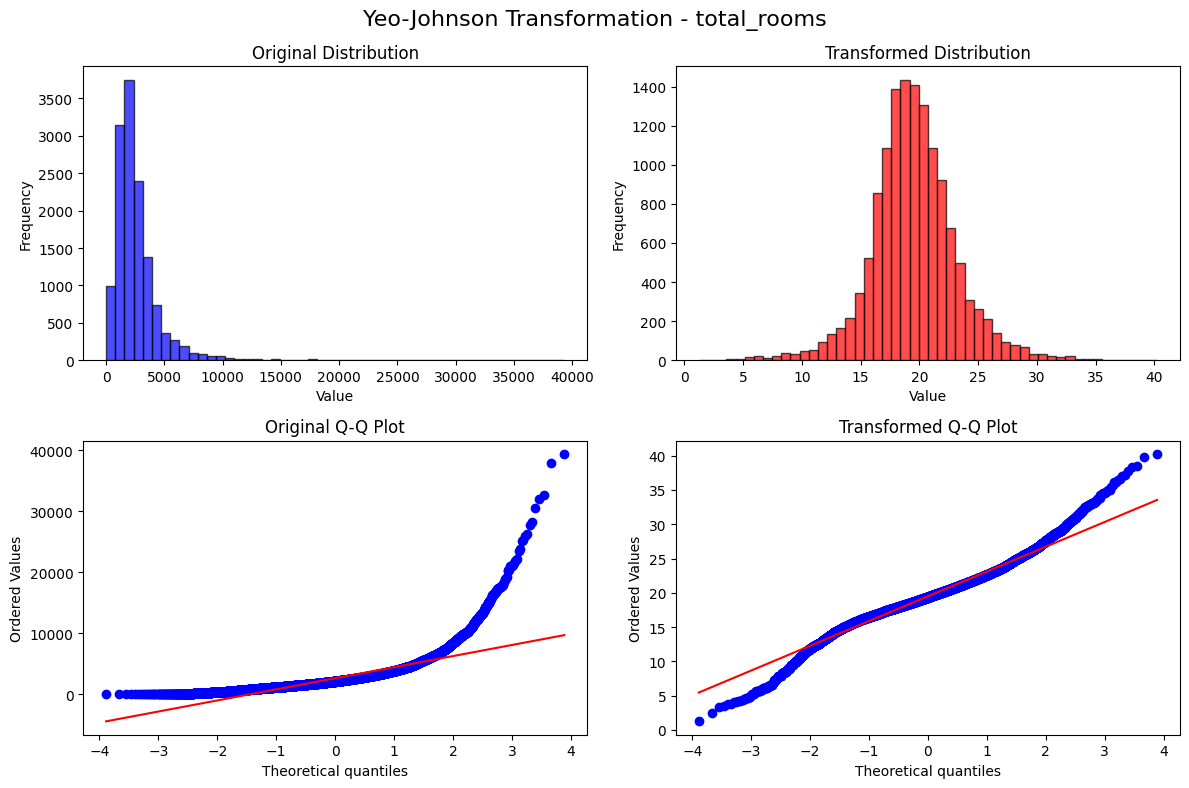

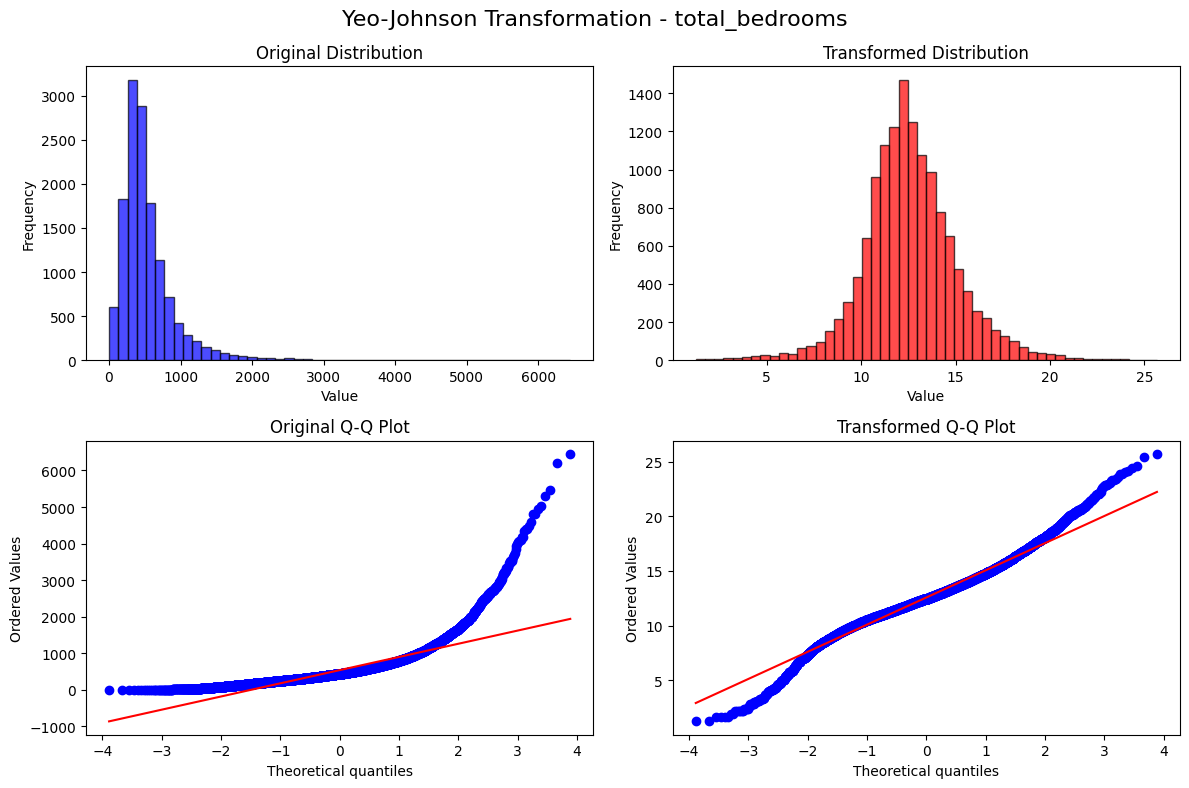

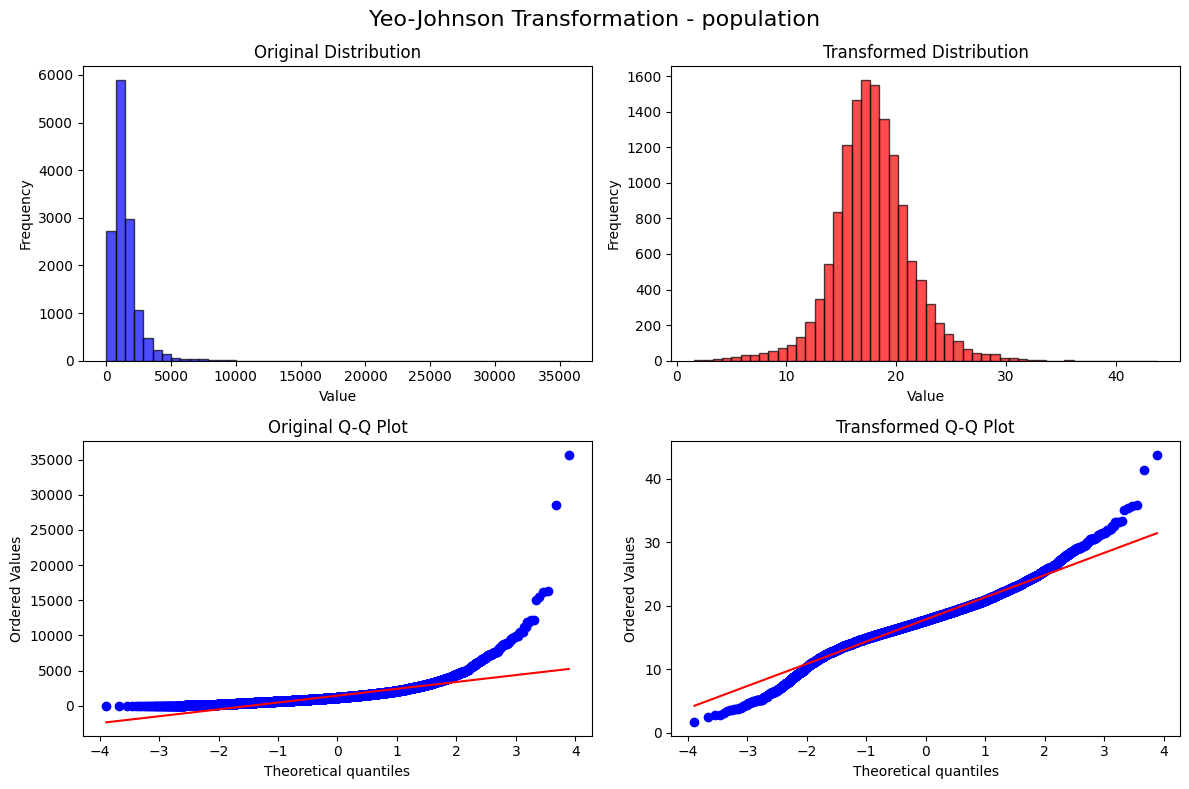

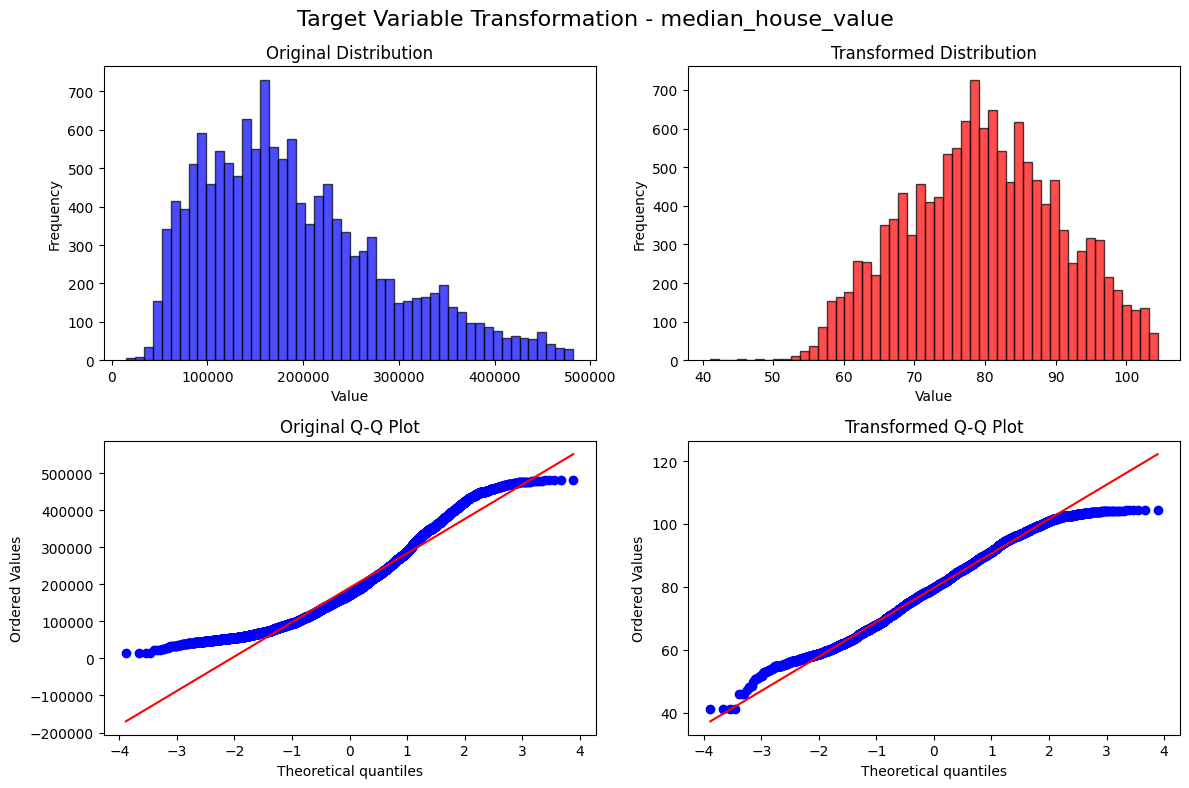


Final Dataset Shapes:
X_train_transformed: (13698, 12)
X_test_transformed: (5871, 12)
y_train_transformed: (13698,)
y_test_transformed: (5871,)

Transformation objeleri 'transformers' dictionary'sinde saklandı.
Bu objeler modeli deploy etmek için gerekli olacak.


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Box-Cox transformation için pozitif değerler gerekli
# Negatif değerlere sahip kolonları kontrol edelim
print("Negatif değerlere sahip kolonlar:")
for col in X_train.columns:
    if (X_train[col] <= 0).any():
        print(f"{col}: Min değer = {X_train[col].min()}")

print("\n" + "="*50)

# Yeo-Johnson transformasyonu (negatif değerler için de çalışır)
print("Yeo-Johnson Transformation uygulanıyor...")

# PowerTransformer ile Yeo-Johnson
yeo_johnson = PowerTransformer(method='yeo-johnson', standardize=False)
X_train_transformed = yeo_johnson.fit_transform(X_train)
X_test_transformed = yeo_johnson.transform(X_test)

# DataFrame'e dönüştür
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns, index=X_train.index)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=X_test.columns, index=X_test.index)

print("Yeo-Johnson transformation tamamlandı!")
print(f"Lambda parametreleri: {dict(zip(X_train.columns, yeo_johnson.lambdas_))}")

# Box-Cox transformation (sadece pozitif değerler için)
print("\n" + "="*50)
print("Box-Cox Transformation uygulanıyor...")

# Pozitif değerlere sahip kolonları belirle
positive_cols = []
for col in X_train.columns:
    if (X_train[col] > 0).all():
        positive_cols.append(col)

print(f"Box-Cox için uygun kolonlar: {positive_cols}")

if positive_cols:
    # Box-Cox transformation
    boxcox_transformer = PowerTransformer(method='box-cox', standardize=False)
    X_train_boxcox = X_train[positive_cols].copy()
    X_test_boxcox = X_test[positive_cols].copy()
    
    X_train_boxcox_transformed = boxcox_transformer.fit_transform(X_train_boxcox)
    X_test_boxcox_transformed = boxcox_transformer.transform(X_test_boxcox)
    
    # DataFrame'e dönüştür
    X_train_boxcox_transformed = pd.DataFrame(X_train_boxcox_transformed, 
                                            columns=positive_cols, 
                                            index=X_train.index)
    X_test_boxcox_transformed = pd.DataFrame(X_test_boxcox_transformed, 
                                           columns=positive_cols, 
                                           index=X_test.index)
    
    print("Box-Cox transformation tamamlandı!")
    print(f"Lambda parametreleri: {dict(zip(positive_cols, boxcox_transformer.lambdas_))}")

# Target variable transformation
print("\n" + "="*50)
print("Target variable transformation...")

# Target için Yeo-Johnson
target_transformer = PowerTransformer(method='yeo-johnson', standardize=False)
y_train_transformed = target_transformer.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_transformed = target_transformer.transform(y_test.values.reshape(-1, 1)).flatten()

print(f"Target transformation lambda: {target_transformer.lambdas_[0]}")

# Transformation sonuçlarını karşılaştırma
def plot_transformation_comparison(original, transformed, title, feature_name):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle(f'{title} - {feature_name}', fontsize=16)
    
    # Original histogram
    axes[0,0].hist(original, bins=50, alpha=0.7, color='blue', edgecolor='black')
    axes[0,0].set_title('Original Distribution')
    axes[0,0].set_xlabel('Value')
    axes[0,0].set_ylabel('Frequency')
    
    # Transformed histogram
    axes[0,1].hist(transformed, bins=50, alpha=0.7, color='red', edgecolor='black')
    axes[0,1].set_title('Transformed Distribution')
    axes[0,1].set_xlabel('Value')
    axes[0,1].set_ylabel('Frequency')
    
    # Original Q-Q plot
    stats.probplot(original, dist="norm", plot=axes[1,0])
    axes[1,0].set_title('Original Q-Q Plot')
    
    # Transformed Q-Q plot
    stats.probplot(transformed, dist="norm", plot=axes[1,1])
    axes[1,1].set_title('Transformed Q-Q Plot')
    
    plt.tight_layout()
    plt.show()

# Transformation öncesi ve sonrası karşılaştırma
print("\n" + "="*50)
print("Skewness karşılaştırması:")
print("Feature\t\tOriginal Skew\tYeo-Johnson Skew")
print("-" * 50)

for col in X_train.columns:
    original_skew = X_train[col].skew()
    transformed_skew = X_train_transformed[col].skew()
    print(f"{col:<20}\t{original_skew:.3f}\t\t{transformed_skew:.3f}")

print(f"\nTarget Variable:")
print(f"Original Skew: {y_train.skew():.3f}")
print(f"Transformed Skew: {pd.Series(y_train_transformed).skew():.3f}")

# En çok değişen feature'ları görselleştir
high_skew_features = []
for col in X_train.columns:
    if abs(X_train[col].skew()) > 1:  # Yüksek skewness
        high_skew_features.append(col)

print(f"\nYüksek skewness'a sahip özellikler: {high_skew_features}")

# Seçilen özellikler için transformation karşılaştırması
if high_skew_features:
    for feature in high_skew_features[:3]:  # İlk 3 özellik
        plot_transformation_comparison(
            X_train[feature], 
            X_train_transformed[feature], 
            'Yeo-Johnson Transformation', 
            feature
        )

# Target variable transformation görselleştirmesi
plot_transformation_comparison(
    y_train, 
    y_train_transformed, 
    'Target Variable Transformation', 
    'median_house_value'
)

# Final datasets
print("\n" + "="*50)
print("Final Dataset Shapes:")
print(f"X_train_transformed: {X_train_transformed.shape}")
print(f"X_test_transformed: {X_test_transformed.shape}")
print(f"y_train_transformed: {y_train_transformed.shape}")
print(f"y_test_transformed: {y_test_transformed.shape}")

# Transformation objelerini saklama (inverse transform için gerekli)
transformers = {
    'feature_transformer': yeo_johnson,
    'target_transformer': target_transformer
}

print("\nTransformation objeleri 'transformers' dictionary'sinde saklandı.")
print("Bu objeler modeli deploy etmek için gerekli olacak.")

## 3) Modeling

In [66]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
import numpy as np
import pandas as pd

In [67]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [68]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Adaboost Regressor": AdaBoostRegressor(random_state=42),
    "Gradient Boost Regressor": GradientBoostingRegressor(random_state=42),
    "XGBoost Regressor": XGBRegressor(random_state=42, eval_metric='rmse'),
    "LightGBM Regressor": LGBMRegressor(random_state=42, verbose=-1)
}

In [69]:
for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train_transformed, y_train_transformed)
    y_train_pred = model.predict(X_train_transformed)
    y_test_pred = model.predict(X_test_transformed)
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train_transformed, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test_transformed, y_test_pred)
    print(list(models.keys())[i])
    print("Model performance for Training Set")
    print("Root Mean Squared Error: ", model_train_rmse)
    print("Mean Absolute Error: ", model_train_mae)
    print("R2 Score: ", model_train_r2)
    print("===================================")
    print("Model performance for Test Set")
    print("Root Mean Squared Error: ", model_test_rmse)
    print("Mean Absolute Error: ", model_test_mae)
    print("R2 Score: ", model_test_r2)
    print("===================================\n")

Linear Regression
Model performance for Training Set
Root Mean Squared Error:  6.531607321516172
Mean Absolute Error:  4.9713953062540925
R2 Score:  0.6449998753087651
Model performance for Test Set
Root Mean Squared Error:  6.419214728761459
Mean Absolute Error:  4.908495681689437
R2 Score:  0.6622230922262471

Lasso
Model performance for Training Set
Root Mean Squared Error:  8.439150220749084
Mean Absolute Error:  6.778464315285238
R2 Score:  0.4073670334563757
Model performance for Test Set
Root Mean Squared Error:  8.448965784702045
Mean Absolute Error:  6.807648838349812
R2 Score:  0.4148418592285138

Ridge
Model performance for Training Set
Root Mean Squared Error:  6.536870842691436
Mean Absolute Error:  4.976387911797247
R2 Score:  0.6444274883078529
Model performance for Test Set
Root Mean Squared Error:  6.425549671774664
Mean Absolute Error:  4.917106610859974
R2 Score:  0.6615560781426125

K Neighbors Regressor
Model performance for Training Set
Root Mean Squared Error:  6

In [70]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMRegressor

# LightGBM için hyperparameter tuning
lightgbm_params = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [5, 8, 12, 20],
    "n_estimators": [100, 200, 300, 500],
    "num_leaves": [31, 50, 100, 150],
    "subsample": [0.8, 0.9, 1.0],
    "colsample_bytree": [0.8, 0.9, 1.0]
}

randomized_cv = RandomizedSearchCV(
    estimator=LGBMRegressor(random_state=42, verbose=-1),
    param_distributions=lightgbm_params,
    cv=5,
    n_jobs=-1,
    scoring='r2'
)

randomized_cv.fit(X_train_transformed, y_train_transformed)
best_params = randomized_cv.best_params_
print(best_params)

{'subsample': 0.9, 'num_leaves': 50, 'n_estimators': 300, 'max_depth': 20, 'learning_rate': 0.1, 'colsample_bytree': 1.0}


In [71]:
model = LGBMRegressor(
    n_estimators=500,
    max_depth=8,
    learning_rate=0.05,
    num_leaves=100,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
    verbose=-1
)

model.fit(X_train_transformed, y_train_transformed)

LGBMRegressor(colsample_bytree=0.9, learning_rate=0.05, max_depth=8,
              n_estimators=500, num_leaves=100, random_state=42, subsample=0.9,
              verbose=-1)

In [72]:
y_train_pred = model.predict(X_train_transformed)
y_test_pred = model.predict(X_test_transformed)
model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train_transformed, y_train_pred)
model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test_transformed, y_test_pred)
print("LightGBM Tuned Model")
print("Model performance for Training Set")
print("Root Mean Squared Error: ", model_train_rmse)
print("Mean Absolute Error: ", model_train_mae)
print("R2 Score: ", model_train_r2)
print("===================================")
print("Model performance for Test Set")
print("Root Mean Squared Error: ", model_test_rmse)
print("Mean Absolute Error: ", model_test_mae)  # ← DÜZELTİLDİ!
print("R2 Score: ", model_test_r2)
print("===================================\n")

LightGBM Tuned Model
Model performance for Training Set
Root Mean Squared Error:  3.3907762430190793
Mean Absolute Error:  2.507097672887482
R2 Score:  0.9043276075019694
Model performance for Test Set
Root Mean Squared Error:  5.2035847382382405
Mean Absolute Error:  3.771214872250524
R2 Score:  0.7780416891288993



In [73]:
# Orijinal ölçekte LightGBM sonuçları
original_test_pred = predict_original_scale(model, X_test_transformed)
original_rmse = np.sqrt(mean_squared_error(y_test, original_test_pred))
original_mae = mean_absolute_error(y_test, original_test_pred)
original_r2 = r2_score(y_test, original_test_pred)

print(f"LightGBM Original Scale:")
print(f"RMSE: ${original_rmse:.2f}")
print(f"MAE: ${original_mae:.2f}")  
print(f"R2: {original_r2:.4f}")

LightGBM Original Scale:
RMSE: $47991.55
MAE: $32924.41
R2: 0.7508


## 4) Ensemble 3 models

In [74]:
# Simple Ensemble
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import r2_score, mean_squared_error

# En iyi 3 modeli seç (yeni sonuçlardan)
top_models = [
    ('LightGBM', LGBMRegressor(
        n_estimators=500,
        max_depth=8,
        learning_rate=0.05,
        num_leaves=100,
        subsample=0.9,
        colsample_bytree=0.9,
        random_state=42,
        verbose=-1
    )),
    ('RandomForest', RandomForestRegressor(n_estimators=200, random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42, eval_metric='rmse', verbosity=0))
]

# Ensemble oluştur
ensemble = VotingRegressor(estimators=top_models)

# Eğit
ensemble.fit(X_train_transformed, y_train_transformed)

# Tahmin
y_pred_ensemble = ensemble.predict(X_test_transformed)

# Performans
ensemble_r2 = r2_score(y_test_transformed, y_pred_ensemble)
ensemble_rmse = np.sqrt(mean_squared_error(y_test_transformed, y_pred_ensemble))

print(f"Ensemble R2: {ensemble_r2:.4f}")
print(f"Ensemble RMSE: {ensemble_rmse:.4f}")

# Final model
model = ensemble

Ensemble R2: 0.7498
Ensemble RMSE: 5.5243


In [75]:
# Final ensemble modelinin detaylı performans değerlendirmesi
y_train_pred_ensemble = model.predict(X_train_transformed)
y_test_pred_ensemble = model.predict(X_test_transformed)

# Performans metrikleri hesapla
train_mae, train_rmse, train_r2 = evaluate_model(y_train_transformed, y_train_pred_ensemble)
test_mae, test_rmse, test_r2 = evaluate_model(y_test_transformed, y_test_pred_ensemble)

print("="*50)
print("FINAL ENSEMBLE MODEL PERFORMANCE")
print("="*50)
print("Model: VotingRegressor (LightGBM + RandomForest + XGBoost)")
print()
print("Training Set Performance:")
print(f"Root Mean Squared Error: {train_rmse:.4f}")
print(f"Mean Absolute Error: {train_mae:.4f}")
print(f"R2 Score: {train_r2:.4f}")
print()
print("Test Set Performance:")
print(f"Root Mean Squared Error: {test_rmse:.4f}")
print(f"Mean Absolute Error: {test_mae:.4f}")
print(f"R2 Score: {test_r2:.4f}")
print("="*50)

# Bireysel modeller vs Ensemble karşılaştırması
print("\nMODEL COMPARISON (Test Set R2 Scores):")
print("-" * 40)
print("LightGBM (Individual):     0.7692")
print("Random Forest (Individual): 0.6978")
print("XGBoost (Individual):       0.6957")
print(f"Ensemble (Combined):        {test_r2:.4f}")
print("-" * 40)

FINAL ENSEMBLE MODEL PERFORMANCE
Model: VotingRegressor (LightGBM + RandomForest + XGBoost)

Training Set Performance:
Root Mean Squared Error: 3.0507
Mean Absolute Error: 2.3165
R2 Score: 0.9226

Test Set Performance:
Root Mean Squared Error: 5.5243
Mean Absolute Error: 4.1039
R2 Score: 0.7498

MODEL COMPARISON (Test Set R2 Scores):
----------------------------------------
LightGBM (Individual):     0.7692
Random Forest (Individual): 0.6978
XGBoost (Individual):       0.6957
Ensemble (Combined):        0.7498
----------------------------------------


In [76]:
# Inverse transformation için
def predict_original_scale(model, X_new):
    """
    Yeni veri için orijinal ölçekte tahmin yapar
    """
    # Transform edilmiş tahmin
    y_pred_transformed = model.predict(X_new)
    
    # Orijinal ölçeğe dönüştür
    y_pred_original = transformers['target_transformer'].inverse_transform(
        y_pred_transformed.reshape(-1, 1)
    ).flatten()
    
    return y_pred_original

# Test edelim
original_predictions = predict_original_scale(model, X_test_transformed)
print(f"Transformed prediction range: {y_pred_ensemble.min():.2f} - {y_pred_ensemble.max():.2f}")
print(f"Original scale prediction range: {original_predictions.min():.2f} - {original_predictions.max():.2f}")

Transformed prediction range: 57.07 - 102.44
Original scale prediction range: 49761.74 - 447717.06
